In [1]:
import torch
from torch import nn, optim, utils
import numpy as np
import cv2
import sys
import os
import sys
import time
import dill
import json
import random
import pathlib
import warnings
from tqdm import tqdm
sys.path.append('../../../Trajectron/trajectron')
sys.path.append('../../../converter/converter_main')
sys.path.append('../../../converter/converter_functions')
sys.path.append('../../../converter/converter_maps')
sys.path.append('../../../Trajectron/trajectron')
import visualization
from visualization import plot_scene_pre_train
import matplotlib.pyplot as plt
from model.trajectron import Trajectron
from model.model_registrar import ModelRegistrar
from model.model_utils import cyclical_lr
from model.dataset import EnvironmentDataset, collate
from tensorboardX import SummaryWriter
from train_utils import prepare_dataset, prepare_dataloader
from preprocessing_utils import normalize_trajectory,resize_map_mask
from data2Kitti_functions import append_crop_maps2df_samples

In [21]:
data_dir = '../../../datasets/processed/Trajectron_format/lyft_road_classes' # liksverkehr
#data_dir = '../../../datasets/processed/Trajectron_format/Kitti_road_classes' # rechtsverkehr
#data_dir = '../../../datasets/processed/Trajectron_format/openDD_full' # linksverkehr
#data_dir = '../../../datasets/processed/Trajectron_format/nuScenes_road_classes_full' # Boston Links, Singapore rechts

data_path = os.path.join(data_dir, 'lyft_fast_val.pkl')#os.listdir(data_dir)[0])
with open(data_path, 'rb') as f:
    env = dill.load(f, encoding='latin1')
scene = env.scenes[0]

In [189]:
# vergiss nicht die scene boundarie schon im env processing auf 90-100 zu stellen, wiel Mantra es braucht

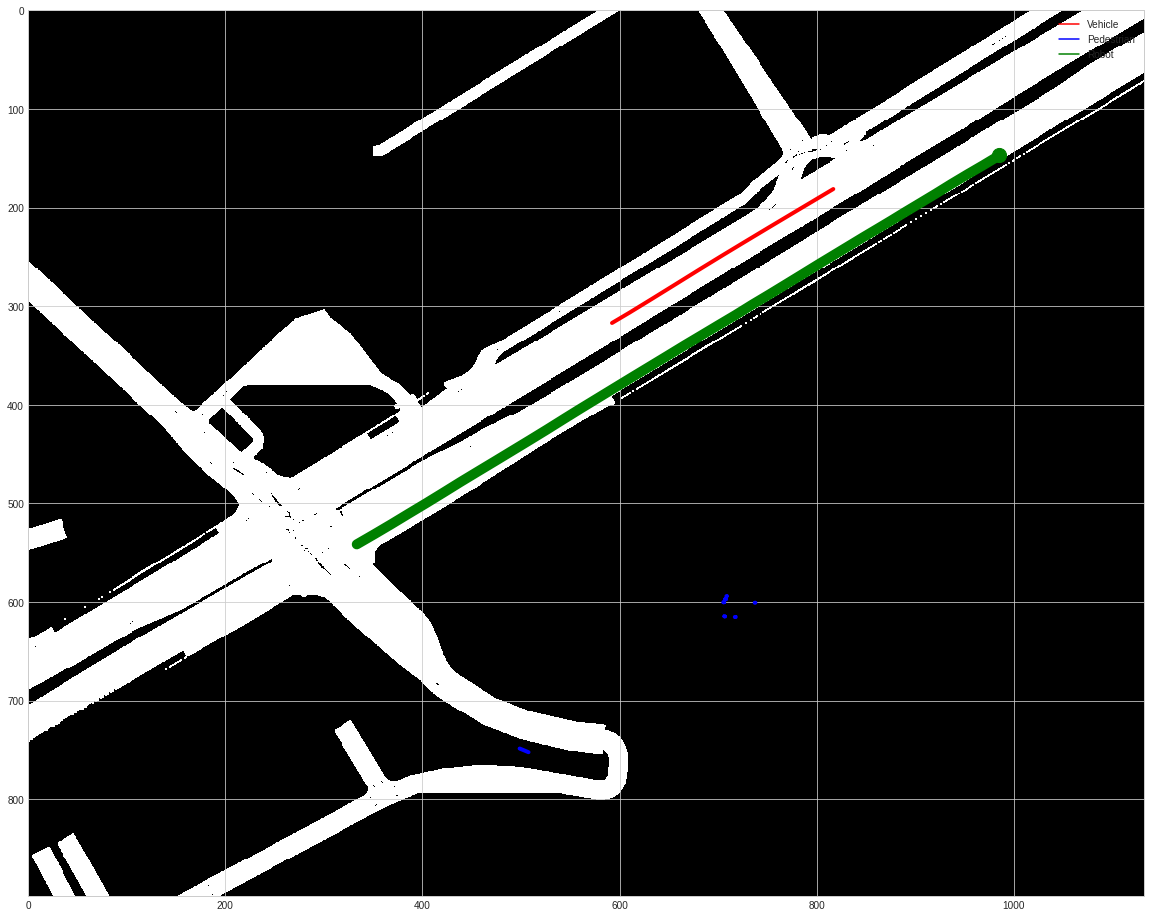

In [22]:
plot_scene_pre_train(np.array([0, 39]), scene)